<a href="https://colab.research.google.com/github/NiceNewton/NiceNewton/blob/main/Randomforestclassifcationchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix

In [50]:
df1 = pd.read_csv("churn-bigml-20.csv")
df2 = pd.read_csv("churn-bigml-80.csv")
data = pd.concat([df1,df2],ignore_index=True)

In [51]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [53]:
data.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

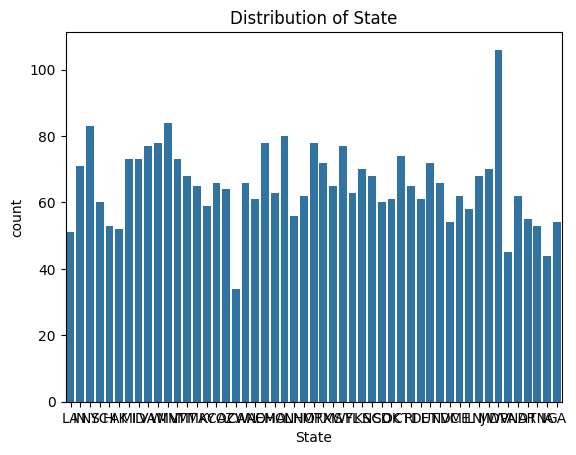

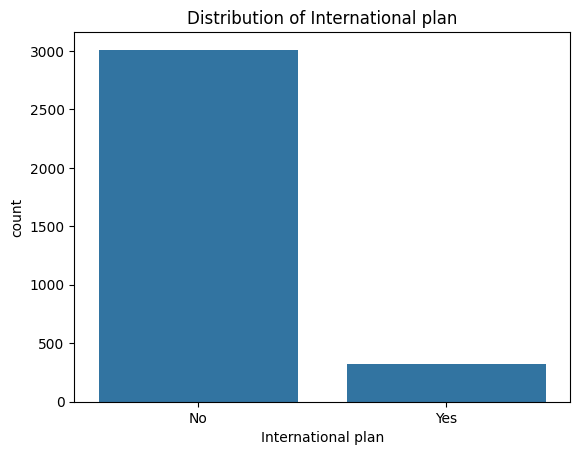

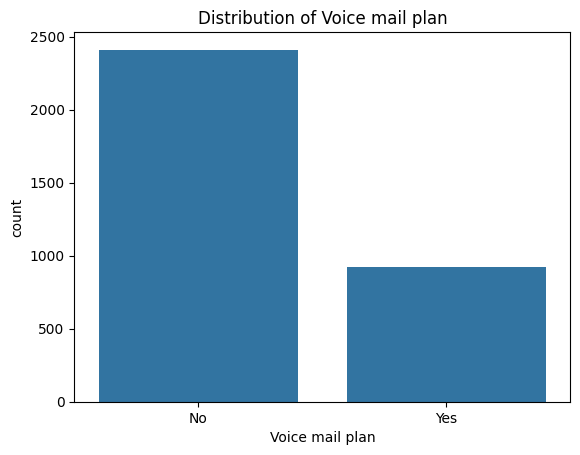

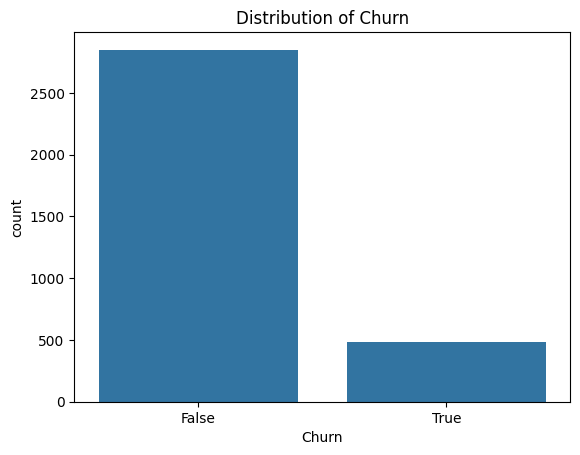

In [55]:
columns = list(data.select_dtypes(include=['bool', 'object']).columns)

for col in columns:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


In [57]:
data['State'].unique()

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [58]:
data['State'].value_counts()

State
WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

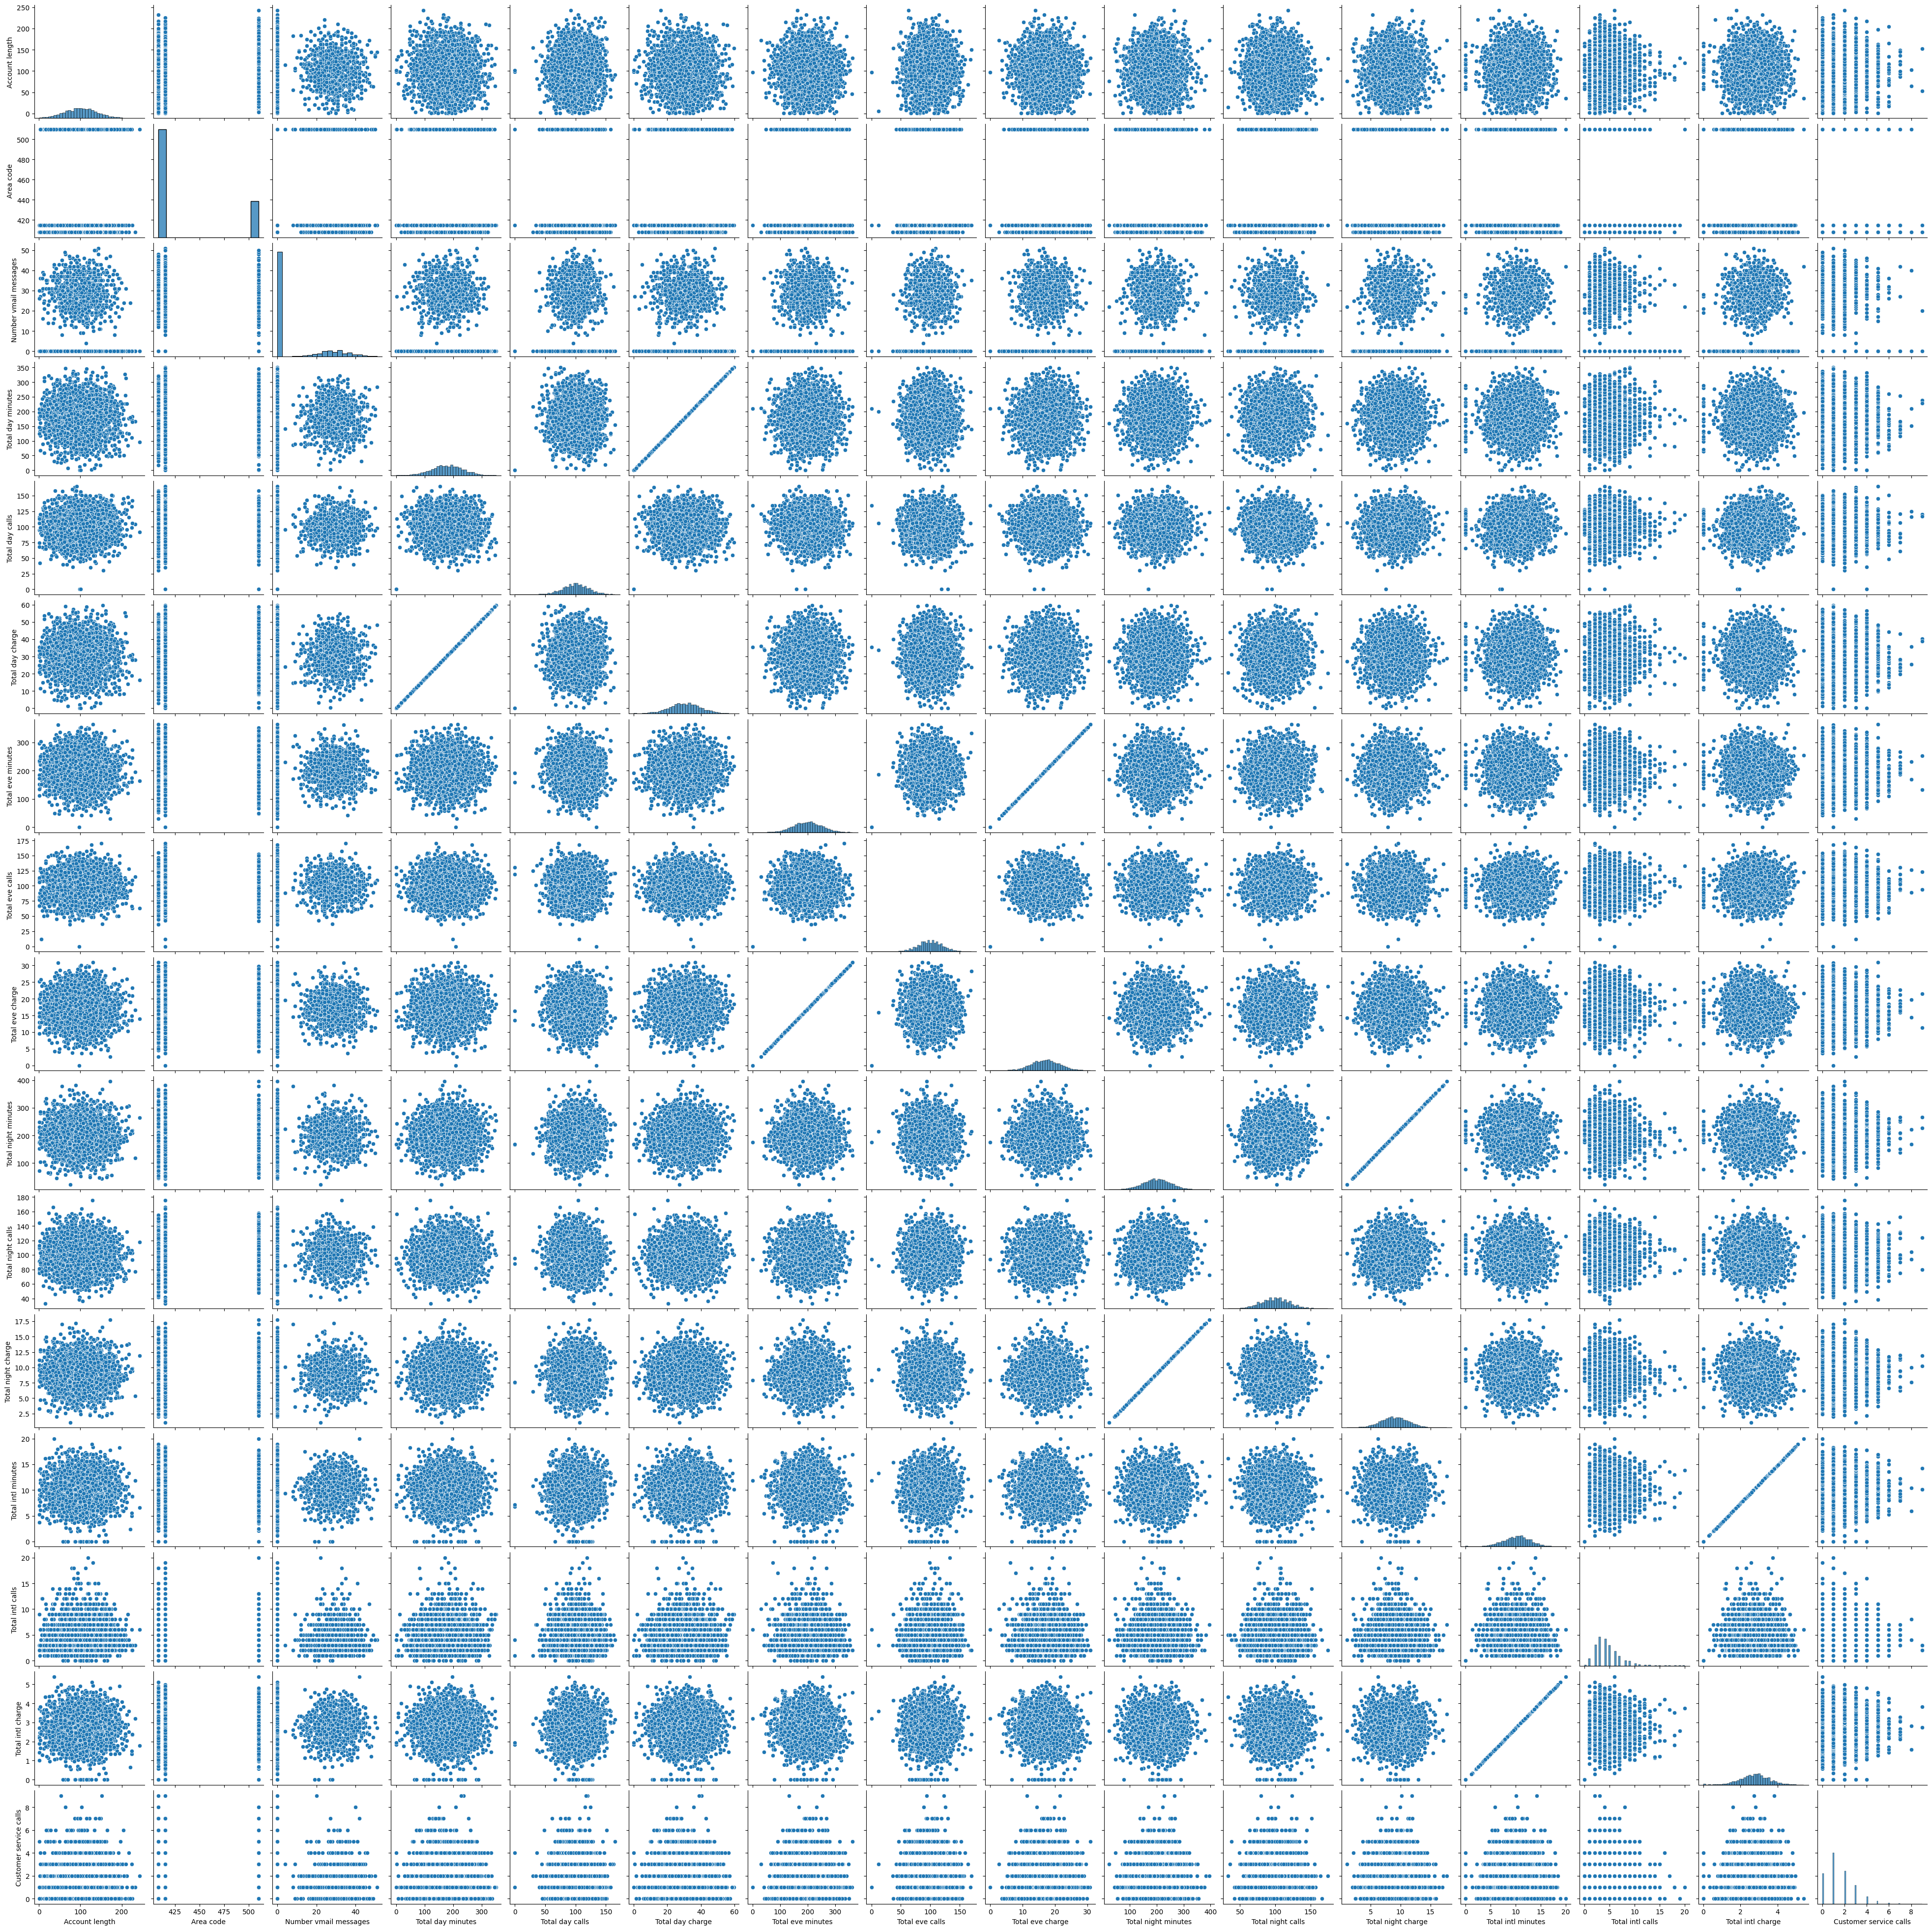

In [59]:
sns.pairplot(data.select_dtypes(include=['float64',
                                            'int64']))

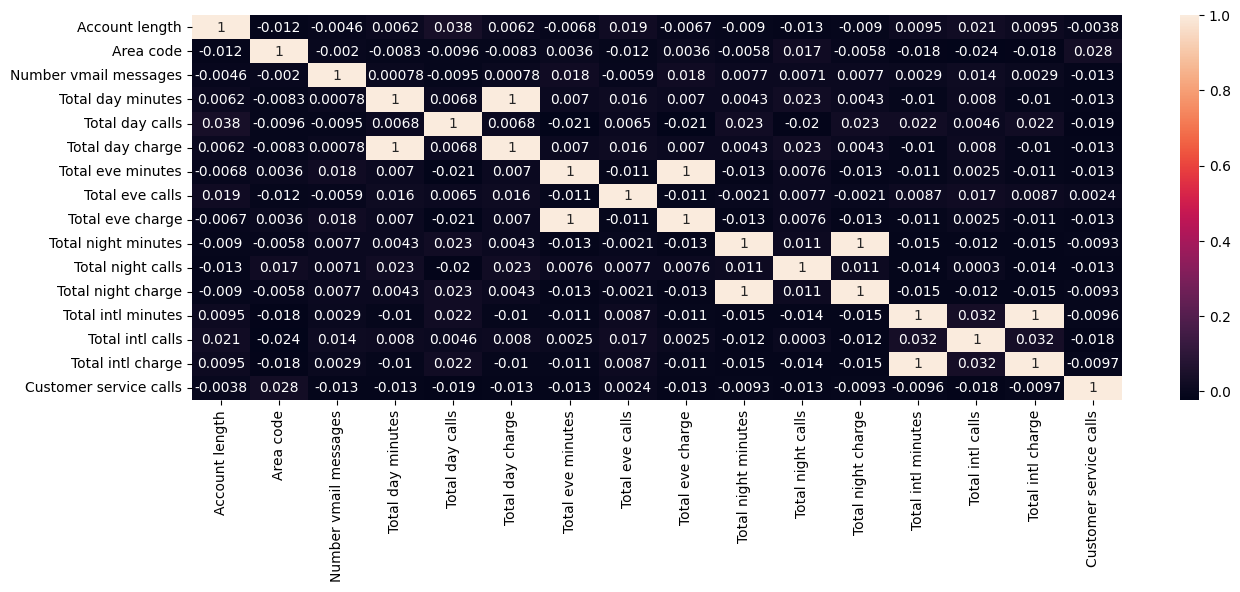

In [60]:
plt.figure(1, figsize=(15,5))

numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

<ipython-input-16-bcb612f6581d>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'Churn VS Account length')

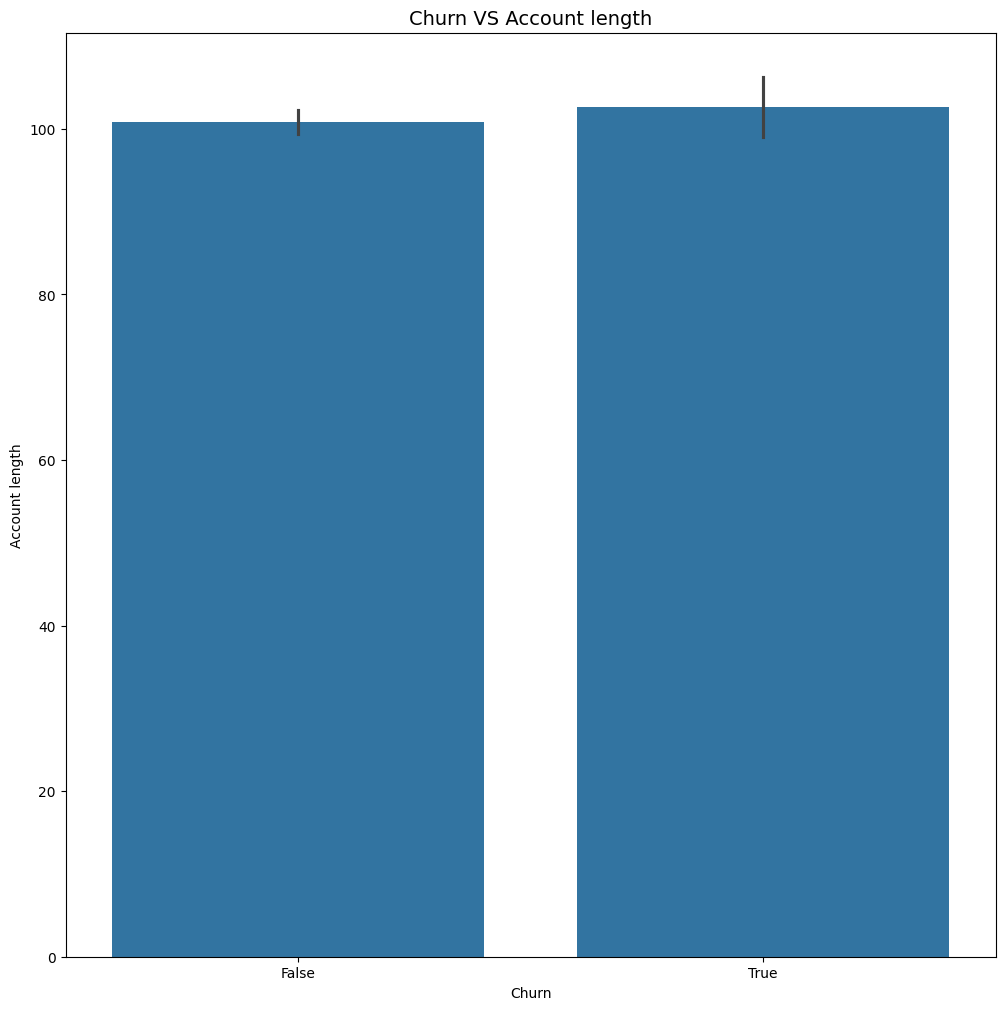

In [16]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=data['Churn'], y=data['Account length'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Churn VS Account length', fontsize=14)

<ipython-input-18-4afde9da3d22>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'Churn VS Total day minutes')

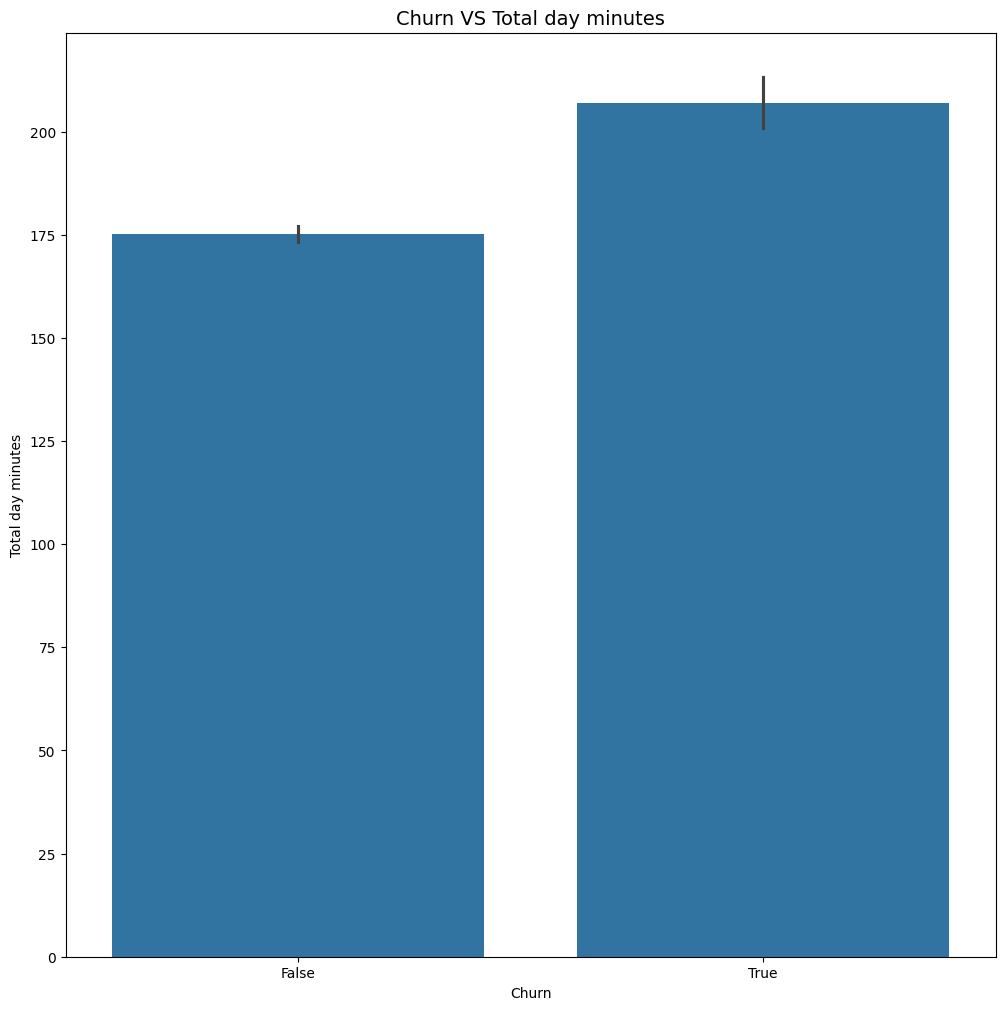

In [18]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=data['Churn'], y=data['Total day minutes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Churn VS Total day minutes', fontsize=14)

Many of the features are related to each other in a linear relationship so we will delete it

In [20]:
data_clean = data.drop(['State','Total day charge','Total intl charge','Total night charge','Total eve charge'], axis=1)

In [21]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [22]:
data_clean.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Churn'],
      dtype='object')

In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
 14  Churn                   3333 non-null   

In [24]:
data_clean['International plan']=data_clean['International plan'].replace(['No','Yes'],[0,1])
data_clean['Voice mail plan']=data_clean['Voice mail plan'].replace(['No','Yes'],[0,1])
data_clean['Churn']=data_clean['Churn'].replace([False,True],[0,1])

<ipython-input-24-84c0e1f9e306>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['International plan']=data_clean['International plan'].replace(['No','Yes'],[0,1])
<ipython-input-24-84c0e1f9e306>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['Voice mail plan']=data_clean['Voice mail plan'].replace(['No','Yes'],[0,1])
<ipython-input-24-84c0e1f9e306>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.i

In [26]:
data_clean.head()

Account length  Area code  International plan  Voice mail plan  \
0             117        408                   0                0   
1              65        415                   0                0   
2             161        415                   0                0   
3             111        415                   0                0   
4              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total eve minutes  Total eve calls  Total night minutes  Total night calls  \
0              351.6               80                215.8                 90   
1              228.5               83                208.8                111   
2              317.8               97                160.6                128   
3              137.3              102                189.6                105   
4              215.1              109                178.7                 90   

   Total intl minutes  Total intl calls  Customer service calls  Churn  
0                 8.7                 4                       1      0  
1                12.7                 6                       4      1  
2                 5.4                 9                       4      1  
3                 7.7                 6                       2      0  
4                11.1                 1                       1      0

In [27]:
target = data_clean.iloc[: , -1].values
feature = data_clean.iloc[: , : -1].values

In [28]:
target.reshape(-1,1)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20,random_state=101)

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [33]:
acc                 = accuracy_score(y_test, predictions)
classReport         = classification_report(y_test, predictions)
confMatrix          = confusion_matrix(y_test, predictions)
kappa_score         = cohen_kappa_score(y_test, predictions)

print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.9115442278860569

Kappa Score :  0.6486935252055455

Confusion Matrix :
 [[539  33]
 [ 26  69]]

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       572
           1       0.68      0.73      0.70        95

    accuracy                           0.91       667
   macro avg       0.82      0.83      0.82       667
weighted avg       0.91      0.91      0.91       667



In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       572
           1       0.68      0.73      0.70        95

    accuracy                           0.91       667
   macro avg       0.82      0.83      0.82       667
weighted avg       0.91      0.91      0.91       667



In [35]:
print(confusion_matrix(y_test,predictions))

[[539  33]
 [ 26  69]]


In [36]:
model = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=8, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                bootstrap=True, oob_score=False,
                                warm_start=False, class_weight=None)

Training the Random Forest model

In [37]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [40]:
acc                 = accuracy_score(y_test, predictions)
classReport         = classification_report(y_test, predictions)
confMatrix          = confusion_matrix(y_test, predictions)
kappa_score         = cohen_kappa_score(y_test, predictions)

print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.9460269865067467

Kappa Score :  0.753044265262465

Confusion Matrix :
 [[566   6]
 [ 30  65]]

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.92      0.68      0.78        95

    accuracy                           0.95       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.95      0.94       667



In [41]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.92      0.68      0.78        95

    accuracy                           0.95       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.95      0.94       667

[[566   6]
 [ 30  65]]


In [42]:
parameters = {'max_depth'    : [6,10],
             'criterion'     : ['gini', 'entropy'],
             'max_features'  : ['auto', 'sqrt', 'log2'],
             'n_estimators'  : [50,100]
              }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,
                    verbose = 1, n_jobs = -1, refit = True)
grid.fit(X_train, y_train)
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
16 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=10, n_estimators=50)

 The best score across ALL searched params:
 0.9321080270067517

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}



In [43]:
cv_results = cross_val_score(model, X_train, y_train, cv = 2, scoring = 'accuracy',
                             n_jobs = -1, verbose = 0)
print("Cross Validation results: ", cv_results)
prt_string = "CV Mean Accuracy: %f (Std: %f)"% (cv_results.mean(), cv_results.std())
print(prt_string)
model.fit(X_train, y_train)

print(); print('========================================================')
print(); print(model.get_params(deep = True))
print(); print('========================================================')

Cross Validation results:  [0.94523631 0.94898725]
CV Mean Accuracy: 0.947112 (Std: 0.001875)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}



In [44]:
pred_Class          = model.predict(X_test)
acc                 = accuracy_score(y_test, pred_Class)
classReport         = classification_report(y_test, pred_Class)
confMatrix          = confusion_matrix(y_test, pred_Class)
kappa_score         = cohen_kappa_score(y_test, pred_Class)

print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.9490254872563718

Kappa Score :  0.7755720053835801

Confusion Matrix :
 [[563   9]
 [ 25  70]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       572
           1       0.89      0.74      0.80        95

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



In [45]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.856 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   1.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.854 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, gamma=0.0001)

 The best score across ALL searched params:
 0.8882271925571459

 The best parameters across ALL searched params:
 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [47]:
pred_Class          = grid.predict(X_test)
acc                 = accuracy_score(y_test, pred_Class)
classReport         = classification_report(y_test, pred_Class)
confMatrix          = confusion_matrix(y_test, pred_Class)
kappa_score         = cohen_kappa_score(y_test, pred_Class)

print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.9025487256371814

Kappa Score :  0.48014964208203925

Confusion Matrix :
 [[566   6]
 [ 59  36]]

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       572
           1       0.86      0.38      0.53        95

    accuracy                           0.90       667
   macro avg       0.88      0.68      0.74       667
weighted avg       0.90      0.90      0.89       667

